Graphe DPA généré: 27770 nœuds en 0.37s


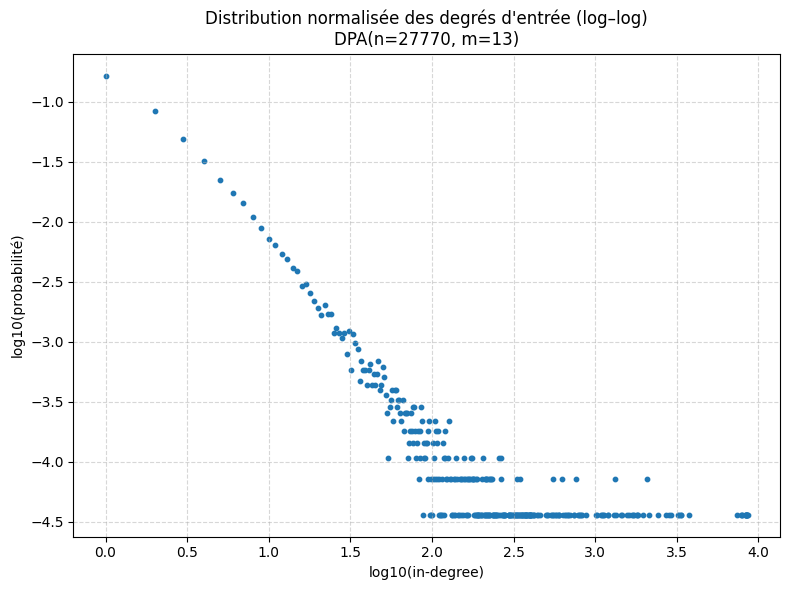

PNG enregistré: dpa_indegree_distribution_loglog.png


In [ ]:
# --- DPA: graphe + distribution in-degree + plot log-log ---
import math, random, time
import matplotlib.pyplot as plt

# ============ Utils graph ============
def make_complete_graph(m):
    """Graphe complet dirigé à m nœuds: chaque nœud pointe vers tous les autres (hors self)."""
    graph = {i: set(j for j in range(m) if j != i) for i in range(m)}
    return graph

def compute_in_degrees(graph):
    """dict node -> in-degree"""
    indeg = {u: 0 for u in graph}
    for u, nbrs in graph.items():
        for v in nbrs:
            indeg[v] += 1
    return indeg

def in_degree_distribution(graph):
    """dict k -> count of nodes with in-degree k"""
    indeg = compute_in_degrees(graph)
    dist = {}
    for k in indeg.values():
        dist[k] = dist.get(k, 0) + 1
    return dist

def normalize_distribution(dist):
    tot = sum(dist.values())
    return {k: v/tot for k, v in dist.items() if tot > 0}

# ============ DPATrial fournie ============
class DPATrial:
    """
    Maintient une liste de nœuds avec duplications,
    telle que random.choice() ~ proba proportionnelle au degré d’entrée courant.
    """
    def __init__(self, num_nodes):
        # liste initiale pour un graphe complet: chaque nœud apparaît (m-1) fois pour ses in-deg
        self._num_nodes = num_nodes
        # dans un graphe complet à m nœuds: in-degree de chaque nœud = m-1
        self._node_numbers = [u for u in range(num_nodes) for _ in range(num_nodes - 1)]

    def run_trial(self, m):
        """
        Sélectionne m voisins (avec répétitions possibles -> on convertit en set),
        puis met à jour la liste interne en ajoutant le nouveau nœud et
        en augmentant la multiplicité des nœuds choisis (leurs in-deg).
        Retourne l'ensemble des voisins choisis.
        """
        chosen = set()
        for _ in range(m):
            chosen.add(random.choice(self._node_numbers))
        # ajouter le nouveau nœud dans la liste (il aura m arêtes sortantes donc 1 occurrence pour lui-même ? non: il a in-degree 0 à l’instant)
        # convention: on ajoute le nouvel identifiant m fois pour refléter ses arêtes sortantes dans la mécanique DPA
        # mais pour l’in-degree, on n’ajoute que 1 occurrence du nouveau nœud (self-loop exclues).
        # Implémentation standard du cours: on ajoute TOUS les nœuds choisis + le nouveau nœud dans _node_numbers
        self._node_numbers.append(self._num_nodes)          # le nouveau nœud
        self._node_numbers.extend(list(chosen))             # +1 occurrence pour chaque nœud choisi (leur in-deg ↑)
        self._num_nodes += 1
        return chosen

# ============ Génération DPA ============
def dpa_graph(n, m, seed=7):
    """
    Construit un graphe DPA avec n nœuds, initialisé par un graphe complet à m nœuds.
    Ajoute ensuite les nœuds m..n-1, chacun avec m arêtes sortantes choisies par préférence attachée.
    """
    assert n >= m >= 1
    random.seed(seed)
    graph = make_complete_graph(m)
    trial = DPATrial(m)
    for new_node in range(m, n):
        nbrs = trial.run_trial(m)
        graph[new_node] = set(nbrs)
    return graph

# ============ Paramètres ============
N = 27770
M = 13   # valeur de la Q3 (degré moyen du graphe réel)

# ============ Build + mesure ============
t0 = time.time()
G = dpa_graph(N, M, seed=42)
t1 = time.time()
print(f"Graphe DPA généré: {len(G)} nœuds en {t1 - t0:.2f}s")

# ============ Distribution in-degree normalisée ============
dist_in = in_degree_distribution(G)
norm_in = normalize_distribution(dist_in)

# points log/log (on enlève degré 0)
xs, ys = [], []
for k, p in norm_in.items():
    if k > 0 and p > 0:
        xs.append(math.log10(k))
        ys.append(math.log10(p))

# ============ Plot ============
plt.figure(figsize=(8,6))
plt.scatter(xs, ys, s=10)
plt.title(f"Distribution normalisée des degrés d'entrée (log–log)\nDPA(n={N}, m={M})")
plt.xlabel("log10(in-degree)")
plt.ylabel("log10(probabilité)")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("dpa_indegree_distribution_loglog.png", dpi=300)
plt.show()
print("PNG enregistré: dpa_indegree_distribution_loglog.png")
